In [5]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## Split the Data into Training and Testing Sets

### Step 1: Read the `heart.csv` data from the `static` folder into a Pandas DataFrame.

In [17]:
# Load dataset 
data = pd.read_csv('static/heart.csv')

data.head(10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              Y      1.5     Flat             1  
9              N      0.0       Up             0

In [18]:
print(data.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [19]:
# List of columns to convert
columns_to_convert = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Loop through the columns and create binary columns
for column in columns_to_convert:
    unique_values = data[column].unique()
    for value in unique_values:
        data[f'{column}_{value.lower()}'] = (data[column] == value).astype(int)

# Drop the original columns
data.drop(columns=columns_to_convert, inplace=True)

# print(data.head(10))

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   
5   39        120          339          0    170      0.0             0   
6   45        130          237          0    170      0.0             0   
7   54        110          208          0    142      0.0             0   
8   37        140          207          0    130      1.5             1   
9   48        120          284          0    120      0.0             0   

   Sex_m  Sex_f  ChestPainType_ata  ...  ChestPainType_asy  ChestPainType_ta  \
0      1      0                  1  ...                  0                 0   
1      0      

In [ ]:
################################

In [6]:
# START - Load Integer dataset: heart_integer_v01.csv
data2 = pd.read_csv('static_[null]/heart_integer_v01.csv')

data2.head(10)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   
5   39        120          339          0    170      0.0             0   
6   45        130          237          0    170      0.0             0   
7   54        110          208          0    142      0.0             0   
8   37        140          207          0    130      1.5             1   
9   48        120          284          0    120      0.0             0   

   Sex_m  Sex_f  ChestPainType_ata  ...  ChestPainType_asy  ChestPainType_ta  \
0      1      0                  1  ...                  0                 0   
1      0      1                  0  ...                  0                 0   
2      1      0                  1  ...                  0                 0   
3      0      1                  0  ...                  1                 0   
4      1      0                  0  ...                  0                 0   
5      1      0                  0  ...                  0                 0   
6      0      1                  1  ...                  0                 0   
7      1      0                  1  ...                  0                 0   
8      1      0                  0  ...                  1                 0   
9      0      1                  1  ...                  0                 0   

   RestingECG_normal  RestingECG_st  RestingECG_lvh  ExerciseAngina_n  \
0                  1              0               0                 1   
1                  1              0               0                 1   
2                  0              1               0                 1   
3                  1              0               0                 0   
4                  1              0               0                 1   
5                  1              0               0                 1   
6                  1              0               0                 1   
7                  1              0               0                 1   
8                  1              0               0                 0   
9                  1              0               0                 1   

   ExerciseAngina_y  ST_Slope_up  ST_Slope_flat  ST_Slope_down  
0                 0            1              0              0  
1                 0            0              1              0  
2                 0            1              0              0  
3                 1            0              1              0  
4                 0            1              0              0  
5                 0            1              0              0  
6                 0            1              0              0  
7                 0            1              0              0  
8                 1            0              1              0  
9                 0            1              0              0  

[10 rows x 21 columns]

In [7]:
print(data2.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_m', 'Sex_f', 'ChestPainType_ata',
       'ChestPainType_nap', 'ChestPainType_asy', 'ChestPainType_ta',
       'RestingECG_normal', 'RestingECG_st', 'RestingECG_lvh',
       'ExerciseAngina_n', 'ExerciseAngina_y', 'ST_Slope_up', 'ST_Slope_flat',
       'ST_Slope_down'],
      dtype='object')


In [8]:
# Split into features (X) and target variable (y)
X = data2.drop('HeartDisease', axis=1)
y = data2['HeartDisease']

In [10]:
# SCALER - MINMAX
# Scale the data, using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the scaler on your feature data
X_scaled2 = scaler.fit_transform(X)

In [11]:
import pandas as pd

# Create a DataFrame from the scaled features
X_scaled2_df = pd.DataFrame(X_scaled2, columns=X.columns)

# Display the first few rows of the scaled dataset
X_scaled2_df.head(10)

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_m  \
0  0.244898       0.70     0.479270        0.0  0.788732  0.295455    1.0   
1  0.428571       0.80     0.298507        0.0  0.676056  0.409091    0.0   
2  0.183673       0.65     0.469320        0.0  0.267606  0.295455    1.0   
3  0.408163       0.69     0.354892        0.0  0.338028  0.465909    0.0   
4  0.530612       0.75     0.323383        0.0  0.436620  0.295455    1.0   
5  0.224490       0.60     0.562189        0.0  0.774648  0.295455    1.0   
6  0.346939       0.65     0.393035        0.0  0.774648  0.295455    0.0   
7  0.530612       0.55     0.344942        0.0  0.577465  0.295455    1.0   
8  0.183673       0.70     0.343284        0.0  0.492958  0.465909    1.0   
9  0.408163       0.60     0.470978        0.0  0.422535  0.295455    0.0   

   Sex_f  ChestPainType_ata  ChestPainType_nap  ChestPainType_asy  \
0    0.0                1.0                0.0                0.0   
1    1.0                0.0                1.0                0.0   
2    0.0                1.0                0.0                0.0   
3    1.0                0.0                0.0                1.0   
4    0.0                0.0                1.0                0.0   
5    0.0                0.0                1.0                0.0   
6    1.0                1.0                0.0                0.0   
7    0.0                1.0                0.0                0.0   
8    0.0                0.0                0.0                1.0   
9    1.0                1.0                0.0                0.0   

   ChestPainType_ta  RestingECG_normal  RestingECG_st  RestingECG_lvh  \
0               0.0                1.0            0.0             0.0   
1               0.0                1.0            0.0             0.0   
2               0.0                0.0            1.0             0.0   
3               0.0                1.0            0.0             0.0   
4               0.0                1.0            0.0             0.0   
5               0.0                1.0            0.0             0.0   
6               0.0                1.0            0.0             0.0   
7               0.0                1.0            0.0             0.0   
8               0.0                1.0            0.0             0.0   
9               0.0                1.0            0.0             0.0   

   ExerciseAngina_n  ExerciseAngina_y  ST_Slope_up  ST_Slope_flat  \
0               1.0               0.0          1.0            0.0   
1               1.0               0.0          0.0            1.0   
2               1.0               0.0          1.0            0.0   
3               0.0               1.0          0.0            1.0   
4               1.0               0.0          1.0            0.0   
5               1.0               0.0          1.0            0.0   
6               1.0               0.0          1.0            0.0   
7               1.0               0.0          1.0            0.0   
8               0.0               1.0          0.0            1.0   
9               1.0               0.0          1.0            0.0   

   ST_Slope_down  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
5            0.0  
6            0.0  
7            0.0  
8            0.0  
9            0.0

In [12]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled2, y, test_size=0.2, random_state=42)

In [13]:
# Import XGBoost
import xgboost as xgb

# Create an XGBoost Classifier instance
xgb_classifier = xgb.XGBClassifier(n_estimators=150, max_depth=15, random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [14]:
# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("----------------------------------------------------------")

print("Accuracy:", accuracy_score(y_test, y_pred))

print("----------------------------------------------------------")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("----------------------------------------------------------")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("----------------------------------------------------------")


----------------------------------------------------------
Accuracy: 0.8804347826086957
----------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        77
           1       0.93      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

----------------------------------------------------------

Confusion Matrix:
 [[70  7]
 [15 92]]
----------------------------------------------------------


In [14]:
xgb_classifier.classes_

array([0, 1])

In [15]:
# Andrews Tree

from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,45))
_ = tree.plot_tree(xgb_classifier.estimators_[1],
                   feature_names=X.columns, class_names=["0","1"],
                   filled=True)

AttributeError: 'XGBClassifier' object has no attribute 'estimators_'

<Figure size 10000x4500 with 0 Axes>

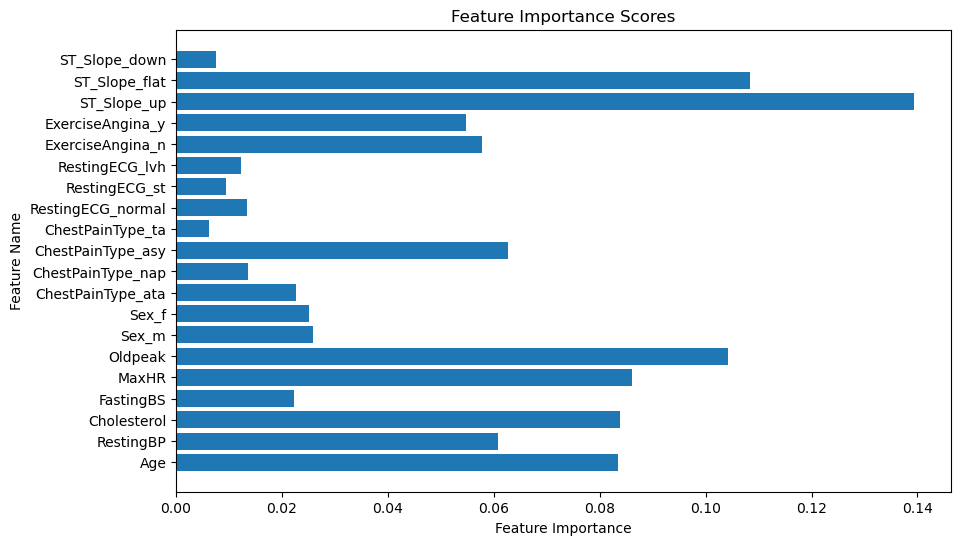

In [79]:
import matplotlib.pyplot as plt

# Feature names (column names)
feature_names = X.columns

# Feature importance scores
feature_importance = rf_classifier.feature_importances_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Scores')
plt.show()